In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
import seaborn as sns

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

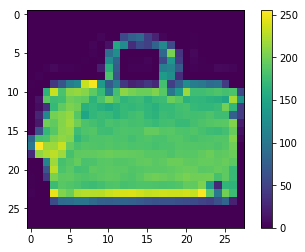

In [6]:
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.gca().grid(False)

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

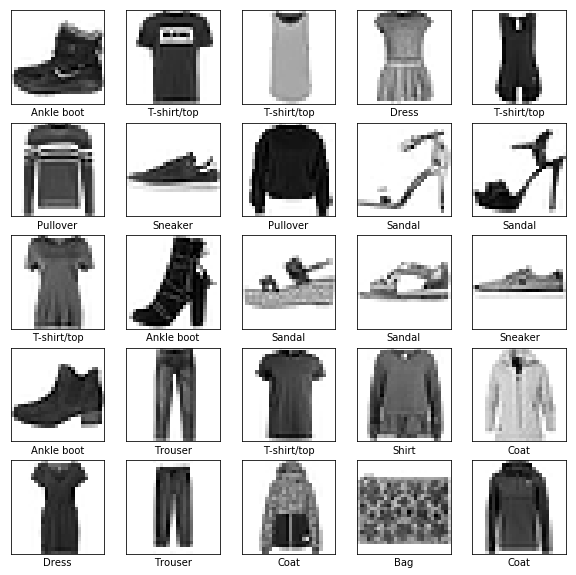

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                         ])
#keras.layers.Dropout(0.05),
#keras.layers.Dense(128, activation=tf.nn.relu),
#keras.layers.ActivityRegularization(l1=0,l2=1e-6),
#keras.layers.Dense(128, activation=tf.nn.relu),

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4919 - acc: 0.8271
Epoch 2/4
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3719 - acc: 0.8655
Epoch 3/4
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3358 - acc: 0.8779
Epoch 4/4
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3111 - acc: 0.8860


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3692 - acc: 0.8643
Test Accuracy: 0.8643


In [16]:
predictions = model.predict(test_images)
print(predictions[0])
print(test_labels[0])

[1.3205434e-06 3.6210537e-07 4.2015859e-07 4.9998022e-08 4.8546360e-07
 2.0169288e-02 4.9316589e-07 2.8146777e-01 1.5227727e-04 6.9820756e-01]
9


C:\Users\npi34092\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


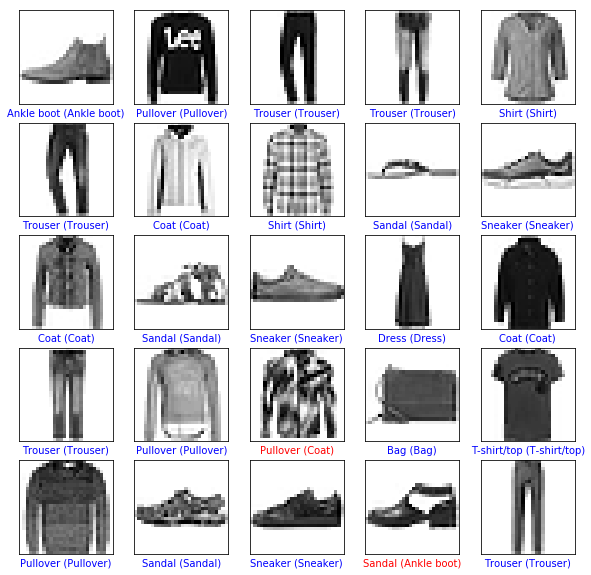

In [17]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [31]:
#for a single image to test (have to expand it to be its own collection):
img = test_images[0]
print(img.shape)

(28, 28)


In [32]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [34]:
predictions = model.predict(img)
print(predictions)

[[8.7615075e-07 3.5420202e-12 1.0897370e-09 3.7970334e-12 2.9854436e-10
  4.7754575e-03 5.3143464e-07 5.3235687e-02 1.1782961e-08 9.4198740e-01]]


In [36]:
prediction = predictions[0]
np.argmax(prediction)

9